# Continuous Distributions

Until now we have been dealing with discrete distributions, where the random variable can only take on a finite number of values. In this notebook, we will introduce continuous distributions, where the random variable can take on any value in a given range.

The continuous distributions differ from the discrete distributions in that the probability of a single value is zero. Instead, the probability is defined over intervals. Just like the probability mass function fully describes a discrete distribution, a continuous distribution is fully described by its probability density function (PDF).


A PDF is a non-negative function $f(x)$ that integrates to 1 over the entire real line. Let $X$ be a continuous random variable with PDF $f(x)$. Then, for any two values. 

$$
P(a \leq X \leq b) = \int_{a}^{b} f(x) dx
$$

The CDF of a continuous random variable is defined just as in the discrete case with the sum replaced by an integral:

$$
F(x) = P(X \leq x) = \int_{-\infty}^{x} f(t) dt
$$


## The Uniform Distribution on \[-1, 1\]

$$
X \sim \text{Uniform}(-1, 1)
$$

$$
f(x) = \begin{cases}
\frac{1}{2} & -1 \leq x \leq 1\\
0 & \text{otherwise}
\end{cases} \\
$$

The density function of the uniform distribution is a constant over the interval \([-1, 1]\). The probability of the random variable falling in any subinterval of \([-1, 1]\) is proportional to the length of the subinterval.


Text(0, 0.5, 'Density')

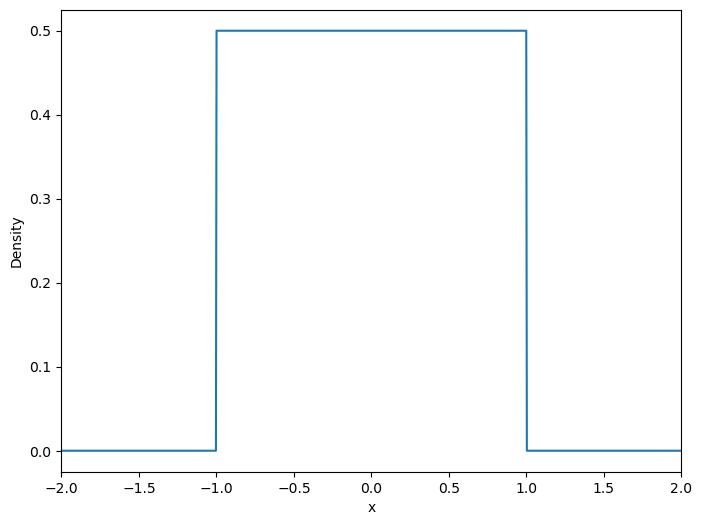

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# Define the range of x
x = np.linspace(-2, 2, 1000)

# Calculate the density of the uniform distribution
y = stats.uniform.pdf(x, loc=-1, scale=2)


# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlim([-2, 2])
plt.xlabel('x')
plt.ylabel('Density')

In [7]:
# Draw 10 random values from the uniform distribution between -1 and 1

x_unif = np.random.uniform(low=-1, high=1, size=10)
x_unif

array([-0.42562517, -0.73915617,  0.72406146,  0.37022054,  0.36073358,
       -0.58400738,  0.71116233, -0.95280152, -0.15487476, -0.25016076])

In [8]:
# How many of the random numbers are smaller than 0? Use np.sum to count the number of random numbers that satisfy the condition.

np.sum(x_unif < 0)

# How many of the random numbers are between 0 and 0.5?

np.sum((x_unif > 0) & (x_unif < 0.5))

2

In [9]:
# Calculate the probability of X being less than 0. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)

stats.uniform.cdf(0, loc=-1, scale=2)

# The following code calculates the probability that the event X < 0.5 occurs (under the uniform distribution on [-1, 1]).

stats.uniform.cdf(0, loc=-1, scale=2)

# Calculate the probability of X being greater than 0.5.

1 - stats.uniform.cdf(0.5, loc=-1, scale=2)

# Calculate the probability that the event X is in the interval [0, 0.5] occurs.

stats.uniform.cdf(0.5, loc=-1, scale=2) - stats.uniform.cdf(0, loc=-1, scale=2)

# Compare the probability with the number of values in the simulation that lie in the interval [0, 0.5].

np.sum((x_unif > 0) & (x_unif < 0.5))

2

## Moments of a Continuous Distribution

The moments of a continuous distribution are defined in the same way as for a discrete distribution, but the summation is replaced by an integral. The expected value of a continuous random variable $X$ is given by:

$$
E(X) = \int_{-\infty}^{\infty} x f(x) dx
$$

The variance of a continuous random variable $X$ is given by:

$$
\text{Var}(X) = \int_{-\infty}^{\infty} (x - E(X))^2 f(x) dx
$$

All properties of the expected value and variance that we have seen for discrete distributions also hold for continuous distributions.


:::{#exm-uniform-distribution}
## Moments of the Uniform Distribution

The density function of the uniform distribution on an interval $[a, b], a < b$ is:

$$
f(x) = \begin{cases}
\frac{1}{b - a} & a \leq x \leq b\\
0 & \text{otherwise}
\end{cases}
$$

The expected value is:

$$
\begin{align*}
E(X) & = \int_{-\infty}^{\infty} x \frac{1}{b - a} dx \\
     & = \int_{a}^{b} x \frac{1}{b - a} dx \\
     & = \frac{1}{b - a} \frac{1}{2} x^2 \Big|_{a}^{b} \\
     & = \frac{1}{b - a} \frac{1}{2} (b^2 - a^2) \\
     & = \frac{1}{\cancel{b - a}} \frac{1}{2} (\cancel{b - a})(b + a) \\
     & = \frac{1}{2} (a + b)
\end{align*}
$$

We can obtain the variance using the formula $Var(X) = E(X^2) - E(X)^2$: The expected value of $X^2$ is:

$$
\begin{align*}
E(X^2) & = \int_{-\infty}^{\infty} x^2 \frac{1}{b - a} dx \\
       & = \int_{a}^{b} x^2 \frac{1}{b - a} dx \\
       & = \frac{1}{b - a} \frac{1}{3} x^3 \Big|_{a}^{b} \\
       & = \frac{1}{b - a} \frac{1}{3} (b^3 - a^3) \\
       & = \frac{1}{b - a} \frac{1}{3} (b - a)(b^2 + ab + a^2) \\
       & = \frac{1}{3} (b^2 + ab + a^2)
\end{align*}
$$

The variance is then:

$$
\begin{align*}
Var(X) & = E(X^2) - E(X)^2 \\
       & = \frac{1}{3} (b^2 + ab + a^2) - \left(\frac{1}{2} (a + b)\right)^2 \\
       & = \frac{1}{3} (b^2 + ab + a^2) - \frac{1}{4} (a^2 + 2ab + b^2) \\
       & = \frac{1}{3} b^2 + \frac{1}{3} ab + \frac{1}{3} a^2 - \frac{1}{4} a^2 - \frac{1}{2} ab - \frac{1}{4} b^2 \\
       & = \frac{1}{12} b^2 - \frac{1}{6} ab + \frac{1}{12} a^2 \\
       & = \frac{1}{12} (b - a)^2
\end{align*}
$$




:::

# The Exponential Distribution

We have already seen the geometric distribution, which models the number of trials until the first success in a sequence of independent Bernoulli trials. The exponential distribution is the continuous analog of the geometric distribution.

The PDF of the exponential distribution is given by:

$$
f(x) = \begin{cases}
\lambda e^{-\lambda x} & x \geq 0\\
0 & x < 0
\end{cases}
$$

:::{#exr-exponential-distribution-CDF}
## CDF of the Exponential Distribution

Calculate the CDF of the exponential distribution.
:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

The CDF of the exponential distribution is given by:

$$
\begin{align*}
F(x) & = P(X \leq x) = \int_{-\infty}^{x} \lambda e^{-\lambda t} dt \\
     & = \int_{0}^{x} \lambda e^{-\lambda t} dt \\
     & = -e^{-\lambda t} \Big|_{0}^{x} \\
     & = -e^{-\lambda x} + e^{-\lambda \cdot 0} \\
     & = 1 - e^{-\lambda x}
\end{align*}
$$

:::


:::{#exr-exponential-distribution-expected-value}
## Expected Value of the Exponential Distribution

Calculate the expected value of the exponential distribution.

:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

To calculate the expected value of the exponential distribution, we need to evaluate the following integral:

$$
\begin{align*}
E(X) & = \int_{-\infty}^{\infty} x \lambda e^{-\lambda x} dx = \int_{0}^{\infty} x \lambda e^{-\lambda x} dx
\end{align*}
$$

We can use integration by parts to solve this integral. The integration by parts rule is related to the product rule for differentiation.

$$
(uv)' = u'v + uv'
$$

where both $u$ and $v$ are functions of $x$ and $u'$ and $v'$ are their derivatives with respect to $x$. Integrate both sides and rearrange to get the integration by parts formula:

$$
\int (uv)' dx = \int u'v dx + \int uv' dx \implies uv = \int u'v dx + \int uv' dx \implies \int uv' dx = uv - \int u'v dx
$$


In our integral it makes sense to choose $u = \lambda x$ and $v' = e^{-\lambda x}$ because the derivative of $u$ is a constant and the integral of $v'$ is easy to calculate. Note that 

$$
\int e^{-\lambda x} = \frac{e^{-\lambda x}}{-\lambda} + C
$$ 

where $C$ is the constant of integration. Now we are ready to apply the integration by parts formula:

$$
\begin{align*}
\int \lambda x e^{-\lambda x} dx & = \lambda x \frac{e^{-\lambda x}}{-\lambda} - \int \lambda \frac{e^{-\lambda x}}{-\lambda} dx \\
& = -x e^{-\lambda x} + \int e^{-\lambda x} dx \\
& = -x e^{-\lambda x} - \frac{e^{-\lambda x}}{\lambda} + C \\
& = e^{-\lambda x} (-x - \frac{1}{\lambda}) + C
\end{align*}
$$

Now that we have the expression for the integral, we can evaluate the expected value:

$$
\begin{align*}
E(X) & = \int_{0}^{\infty} x \lambda e^{-\lambda x} dx \\
 & = e^{-\lambda x} (-x - \frac{1}{\lambda}) \Big|_{0}^{\infty} \\
 & = \lim_{x \to \infty} e^{-\lambda x} (-x - \frac{1}{\lambda}) - e^{-\lambda \cdot 0} (-0 - \frac{1}{\lambda}) \\
 & = 0 - 0 - (-0 - \frac{1}{\lambda}) \\
 & = \frac{1}{\lambda}
\end{align*}
$$

Note that the last result uses the fact that $\lim_{x \to \infty} e^{-\lambda x} = 0$ and $\lim_{x \to \infty} x e^{-\lambda x} = 0$. The latter limit can be shown by applying L'Hopital's rule.

To find the variance of the exponential distribution, we can find the second uncentered momen of the distribution (i.e., $E(X^2)$) and then use the formula $\text{Var}(X) = E(X^2) - E(X)^2$. Again,
we can use integration by parts to find the integral.

$$
\begin{align*}
E(X^2) & = \int_{0}^{\infty} x^2 \lambda e^{-\lambda x} dx = \\
& =  -x^2 e^{-\lambda x}\Big|_{0}^{\infty} + \frac{2}{\lambda} \int_{0}^{\infty} \lambda x e^{-\lambda x} dx \\
& = 0 - 0 + \frac{2}{\lambda} \frac{1}{\lambda} = \frac{2}{\lambda^2}
\end{align*}
$$

Finally, we can calculate the variance:

$$
\begin{align*}
\text{Var}(X) & = E(X^2) - E(X)^2 = \frac{2}{\lambda^2} - \frac{1}{\lambda^2} = \frac{1}{\lambda^2}
\end{align*}
$$

:::


Text(0, 0.5, 'Density')

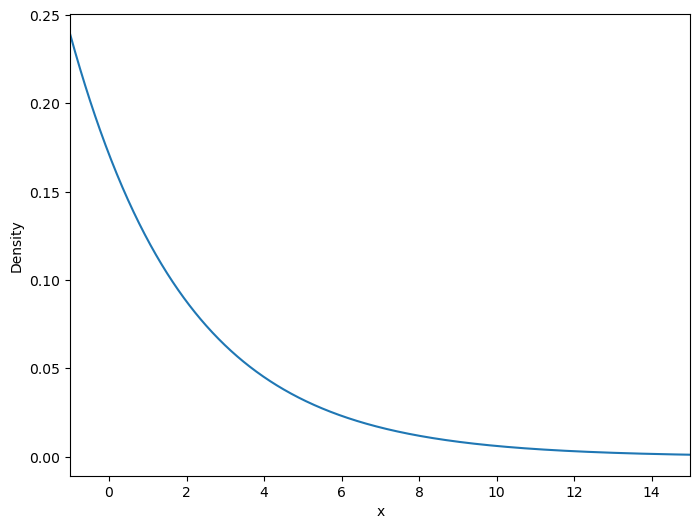

In [10]:
# Create a grid of 1000 points between -1 and 15
x = np.linspace(-1, 15, 1000)

# Calculate the density of the exponential distribution with rate parameter 1

y = stats.expon.pdf(x, loc=-2, scale=3)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlim([-1, 15])
plt.xlabel('x')
plt.ylabel('Density')


## The Normal Distribution

The normal distribution is the most important continuous distribution in statistics. It is symmetric around the mean and has a bell-shaped curve. The PDF of the normal distribution is given by:


$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

As a shorthand notation, we write:

$$
X \sim N(\mu, \sigma^2)
$$

to say that $X$ is normally distributed with mean $\mu$ and variance $\sigma^2$. You do not need to memorize the formula for the normal distribution PDF, but you should a couple of important properties:


Text(0, 0.5, 'Density')

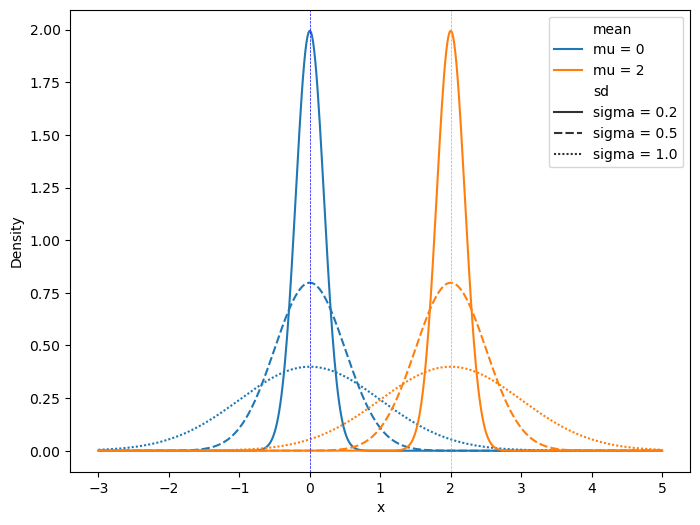

In [11]:
# Visualize the density of the normal distribution with different means and standard deviations

# Define the means and standard deviations for which we want to plot the normal distribution

means = [0, 2]
sds = [0.2, 0.5, 1]

# Create a grid of x values
x = np.linspace(-3, 5, 500)

# Create a DataFrame with all combinations of means, sds, and x values
df = pd.DataFrame([(mean, sd, x_val, stats.norm.pdf(x_val, mean, sd)) 
                   for mean in means for sd in sds for x_val in x], 
                  columns=['mean', 'sd', 'x', 'y'])

# Create labels for mean and sd
df['mean'] = r'mu = ' + df['mean'].astype(str)
df['sd'] = r'sigma = ' + df['sd'].astype(str)

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='x', y='y', hue='mean', style='sd')
plt.axvline(0, color='blue', linestyle='--', linewidth=0.5)
plt.axvline(2, color='orange', linestyle='--', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('Density')


:::{.callout-important}
## Properties of the Normal Distribution


$$
\begin{align*}
E(X) & = \mu \\
Var(X) & = \sigma^2
\end{align*}
$$

If $X \sim N(\mu, \sigma^2)$, then $Z = \frac{X - \mu}{\sigma} \sim N(0, 1)$ is called the standard normal distribution. The standard normal distribution has mean 0 and variance 1.

If $X_1, X_2, \ldots, X_n$ are independent and identically distributed (i.i.d.) random variables with mean $\mu$ and variance $\sigma^2$, then sum of the random variables is normally distributed:

$$
\sum_{i=1}^{n} X_i \sim N(n\mu, n\sigma^2)
$$

:::

It turns out the sum of independent random variables from any distribution (as long as the variance is finite) approaches a normal distribution as the number of variables increases. This is known as the central limit theorem. The central limit theorem is one of the most important results in statistics and is the reason why the normal distribution is so important.

:::{#thm-central-limit-theorem}
## Central Limit Theorem

Let $X_1, X_2, \ldots, X_n$ be i.i.d. random variables with mean $\mu$ and variance $\sigma^2$. Let $S_n = \sum_{i=1}^{n} X_i$. Then, as $n$ approaches infinity, the distribution of $\frac{S_n - n\mu}{\sqrt{n}\sigma}$ approaches the standard normal distribution.

$$
\frac{S_n - n\mu}{\sqrt{n}\sigma} \xrightarrow{d} N(0, 1)
$$

:::

([<matplotlib.axis.XTick at 0x7ea6835a6b40>,
 [Text(0, 0, '0'),
  Text(4, 0, '4'),
  Text(8, 0, '8'),
  Text(12, 0, '12'),
  Text(16, 0, '16')])

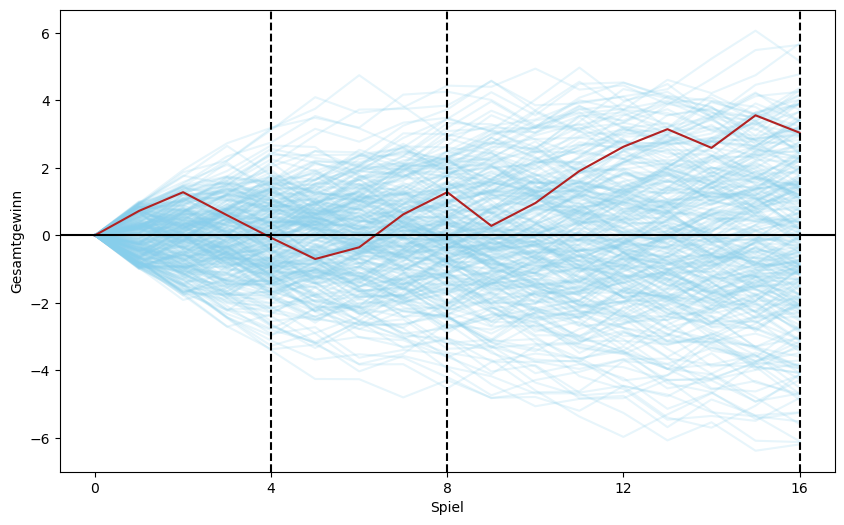

In [12]:
players_n = 300
games_n = 16

# Create a DataFrame similar to expand_grid in R
unif_games = pd.DataFrame(
    np.array(
        np.meshgrid(
            np.arange(1, games_n + 1),
            np.arange(1, players_n + 1)
        )).T.reshape(-1, 2),
    columns=['game', 'player']
)

# Add result column with random uniform values between -1 and 1
unif_games['result'] = np.random.uniform(-1, 1, size=len(unif_games))

# Add initial values for each player
initial_values = pd.DataFrame(
    {'player': np.arange(1, players_n + 1), 'game': 0, 'result': 0})
unif_games = pd.concat([unif_games, initial_values])

# Sort values and calculate running total for each player
unif_games = unif_games.sort_values(['player', 'game'])
unif_games['running_total'] = unif_games.groupby('player')['result'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))
for player in unif_games['player'].unique():
    player_data = unif_games[unif_games['player'] == player]
    plt.plot(player_data['game'], player_data['running_total'],
             color='skyblue', alpha=0.2)

# First player
player_data = unif_games[unif_games['player'] == 1]
plt.plot(player_data['game'], player_data['running_total'],
         color='firebrick', label='Player 1')

plt.axhline(0, color='black')

for mark in [4, 8, 16]:
    plt.axvline(x=mark, linestyle='--', color='black')

plt.xlabel('Game Number')
plt.ylabel('Total Winnings')
plt.xticks([0, 4, 8, 12, 16])

Text(0.5, 0, 'Running total')

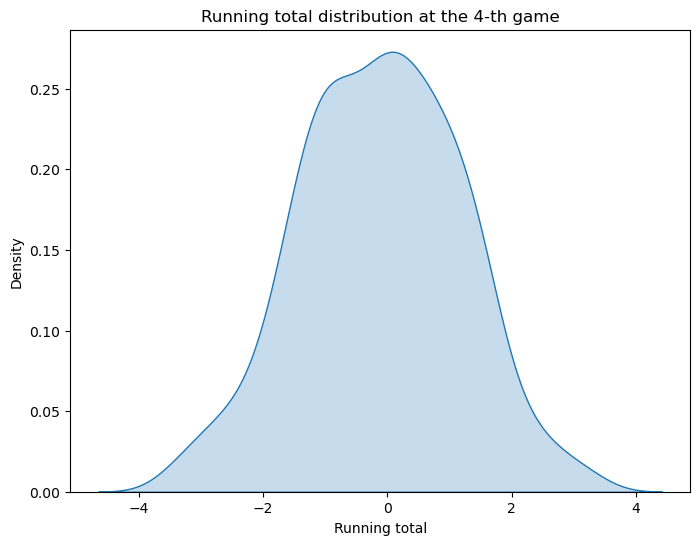

In [13]:
game_4 = unif_games[unif_games['game'] == 4]

plt.figure(figsize=(8, 6))
sns.kdeplot(data=game_4, x='running_total', fill=True)
plt.title('Running total distribution at the 4-th game')
plt.xlabel('Running total')

Text(0.5, 0, 'Running total')

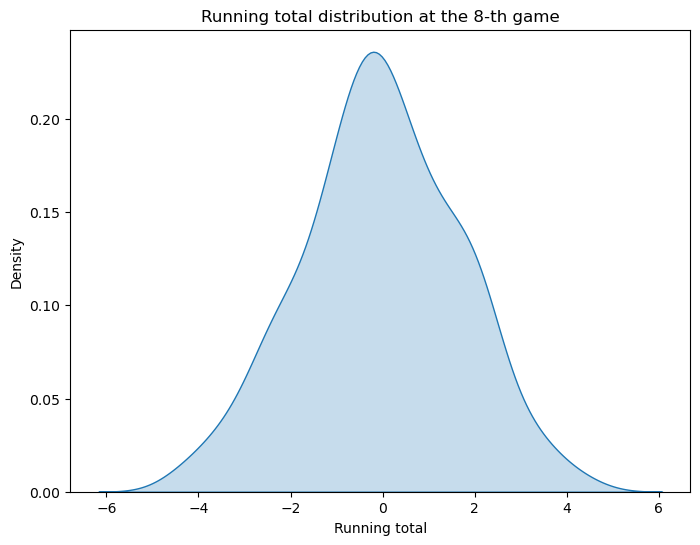

In [14]:
# Density estimate plot for the 8-th game

game_8 = unif_games[unif_games['game'] == 8]

plt.figure(figsize=(8, 6))
sns.kdeplot(data=game_8, x='running_total', fill=True)
plt.title('Running total distribution at the 8-th game')
plt.xlabel('Running total')

Text(0.5, 0, 'Running total')

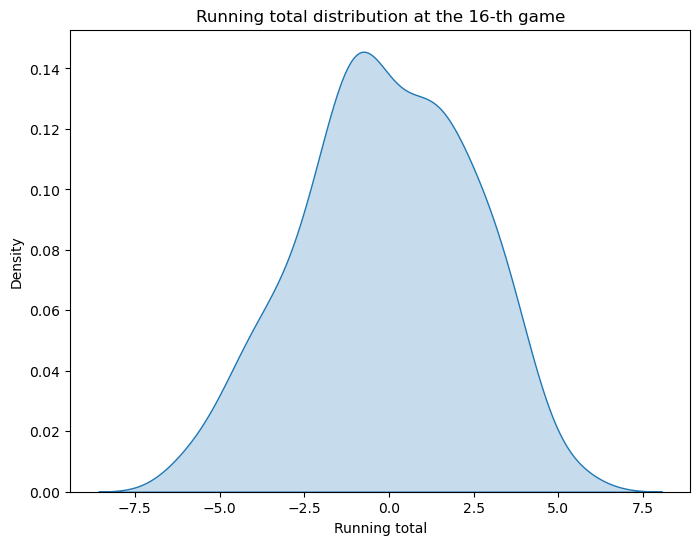

In [15]:
game_16 = unif_games[unif_games['game'] == 16]

plt.figure(figsize=(8, 6))
sns.kdeplot(data=game_16, x='running_total', fill=True)
plt.title('Running total distribution at the 16-th game')
plt.xlabel('Running total')

## Probabilities with the Normal Distribution

As with other distributions, we can calculate probabilities with the normal distribution using the CDF, which is the integral of the PDF over the interval \(-\infty, x\). The CDF of the normal distribution does not have a closed-form solution, but it can be calculated using numerical methods or software. Before the advent of computers, tables were used to look up the values of the CDF for different values of \(x\). These tables are known as z-tables.

In [16]:
# Create a z-table for the 

import pandas as pd
import numpy as np
from scipy.stats import norm

# Define the range of z-scores
z_scores = np.arange(-3.0, 3.1, 0.1)

# Calculate the probabilities for each z-score
probabilities = norm.cdf(z_scores)

# Create a DataFrame
df = pd.DataFrame({
    'z': z_scores,
    'P(x < Z)': probabilities
})

df

,z,P(x < Z)
0,-3.0,0.001350
1,-2.9,0.001866
2,-2.8,0.002555
3,-2.7,0.003467
4,-2.6,0.004661
...,...,...
56,2.6,0.995339
57,2.7,0.996533
58,2.8,0.997445
59,2.9,0.998134


:::{#exr-normal-distribution-probabilities}

Assume that the weight of adults in Sofia is normally distributed with mean 70 kg and standard deviation 10 kg. The lift in a building can carry a maximum of 550 kg. What is the probability that carry capacity of the lift is exceeded if 7 adults enter the lift?

:::

:::{.callout-note collapse="true"}
## Solution (click to expand)


:::

In [ ]:
# Calculate the probability 

In [56]:
# Sample 5 persons at random from a normal population with mean 70 and sd = 10
import numpy as np

R = 100000
n = 7
mu = 70
sd = 10

simulations = np.random.randn(R, n)*10 + 70
simulations



array([[54.80852255, 85.2435055 , 93.00227835, ..., 63.28608221,
        78.89095745, 72.66262229],
       [77.61097114, 63.49141641, 84.19259612, ..., 82.81472104,
        83.38789215, 70.35800453],
       [68.1166681 , 74.11941468, 57.07670478, ..., 62.80228658,
        85.89935244, 73.78847337],
       ...,
       [60.53896895, 56.99222065, 75.41210758, ..., 52.64939231,
        76.4499687 , 36.61129862],
       [66.97275962, 76.75838807, 72.2001932 , ..., 60.03787117,
        79.27972619, 68.8237418 ],
       [80.88345189, 61.68591608, 67.18529168, ..., 83.51822243,
        74.54203195, 86.27442592]])

In [52]:
weight = np.sum(simulations, axis = 1)
weight

array([487.8154379 , 480.56678913, 478.13751571, ..., 518.27384314,
       475.03337481, 488.5716589 ])

In [54]:
np.mean(weight > 550)

0.01146

In [55]:
np.max(weight)

598.6602645445046